In [1]:
# Step 1: Install required packages
!pip install ultralytics opencv-python ipython nest_asyncio ipywidgets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 97.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 78.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    

📸 Please allow webcam access & click 'Capture Photo' button.


<IPython.core.display.Javascript object>


0: 320x416 2 Thrips-Bugss, 79.1ms
Speed: 2.1ms preprocess, 79.1ms inference, 1.1ms postprocess per image at shape (1, 3, 320, 416)


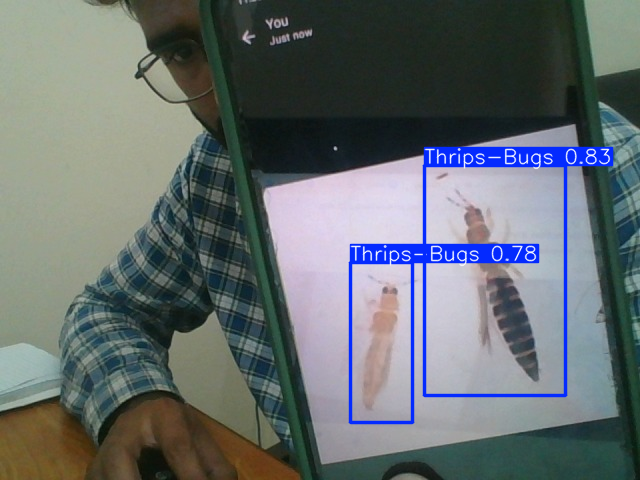

In [8]:
# Import libraries
import cv2
import numpy as np
from ultralytics import YOLO
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
from google.colab.patches import cv2_imshow

# Load YOLO model
model = YOLO('best.pt')  # Make sure 'best.pt' is uploaded

# Function to capture webcam image using JavaScript
def take_photo():
    js = Javascript('''
        async function takePhoto() {
            const div = document.createElement('div');
            const video = document.createElement('video');
            const button = document.createElement('button');
            button.textContent = '📸 Capture Photo';
            div.appendChild(video);
            div.appendChild(button);
            document.body.appendChild(div);

            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            video.srcObject = stream;
            await video.play();

            // Resize video display
            video.style.width = '640px';

            // Wait for button press
            await new Promise((resolve) => button.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);

            stream.getTracks().forEach(track => track.stop());
            div.remove();

            return canvas.toDataURL('image/jpeg');
        }
        takePhoto();
    ''')
    display(js)
    data = eval_js("takePhoto()")
    binary = b64decode(data.split(',')[1])
    img_array = np.frombuffer(binary, dtype=np.uint8)
    img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
    return img

# Capture image from webcam
print("📸 Please allow webcam access & click 'Capture Photo' button.")
frame = take_photo()

# Run YOLOv8 inference
results = model(frame)

# Plot bounding boxes
annotated_frame = results[0].plot()

# Display result in Colab
cv2_imshow(annotated_frame)


📸 Capturing photo... Please allow access & click 'Capture Photo'.


<IPython.core.display.Javascript object>


0: 320x416 2 Thrips-Bugss, 273.4ms
Speed: 15.7ms preprocess, 273.4ms inference, 35.4ms postprocess per image at shape (1, 3, 320, 416)


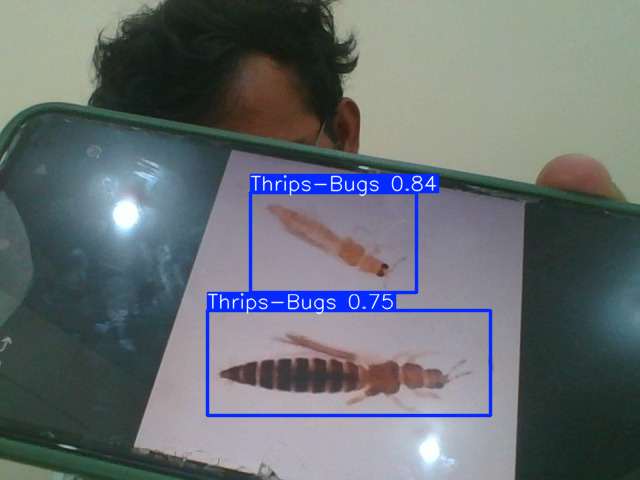

In [6]:
# ✅ Import libraries
import cv2
import numpy as np
from ultralytics import YOLO
from IPython.display import display, Javascript, clear_output
from google.colab.output import eval_js
from base64 import b64decode
from google.colab.patches import cv2_imshow
import time
import ipywidgets as widgets
from google.colab import files

# ✅ Upload YOLO best.pt model
print("⬆️ Please upload your 'best.pt' YOLO model file.")
uploaded = files.upload()

# ✅ Load YOLO model (after upload)
model = YOLO('best.pt')
print("✅ Model loaded successfully!")

# ✅ Webcam Photo Capture Function
def take_photo():
    js = Javascript('''
        async function takePhoto() {
            const div = document.createElement('div');
            const video = document.createElement('video');
            const button = document.createElement('button');
            button.textContent = '📸 Capture Photo';
            div.appendChild(video);
            div.appendChild(button);
            document.body.appendChild(div);

            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            video.srcObject = stream;
            await video.play();

            video.style.width = '640px';

            await new Promise((resolve) => button.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);

            stream.getTracks().forEach(track => track.stop());
            div.remove();

            return canvas.toDataURL('image/jpeg');
        }
        takePhoto();
    ''')
    display(js)
    data = eval_js("takePhoto()")
    binary = b64decode(data.split(',')[1])
    img_array = np.frombuffer(binary, dtype=np.uint8)
    img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
    return img

# ✅ Function for YOLO inference and display
def detect_and_show(frame):
    results = model(frame)
    annotated_frame = results[0].plot()
    cv2_imshow(annotated_frame)

# ✅ Upload Image from File
def upload_image_button_clicked(b):
    clear_output(wait=True)
    print("📁 Please select an image file to upload.")
    uploaded_file = files.upload()
    for file_name in uploaded_file.keys():
        img = cv2.imread(file_name)
        detect_and_show(img)
    display(ui)

# ✅ Capture from Webcam
def capture_photo_button_clicked(b):
    clear_output(wait=True)
    print("📸 Capturing photo... Please allow access & click 'Capture Photo'.")
    try:
        frame = take_photo()
        detect_and_show(frame)
    except Exception as e:
        print(f"❌ Error: {e}")
        print("⚠️ Please check webcam permission and try again.")
    display(ui)

# ✅ Buttons
upload_button = widgets.Button(description="📁 Upload Image", button_style='info')
upload_button.on_click(upload_image_button_clicked)

webcam_button = widgets.Button(description="📸 Capture from Webcam", button_style='success')
webcam_button.on_click(capture_photo_button_clicked)

ui = widgets.HBox([upload_button, webcam_button])

# ✅ Show UI Buttons
display(ui)
